จากชุดข้อมูล student_score.csv และ TestDuration.csv ให้นิสิตแสดงการเขียนโค้ดเพื่อทำ data wrangling และทำการ plot ให้ได้ดังรูปต่อไปนี้

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####  
### ตอนที่ 1: ชุดข้อมูล student_score.csv

In [2]:
df_score = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/student_score.csv")
df_score.head()

,ID,stat,math,comp,sec
0,ID-1,45.97,26.52,52.62,1
1,ID-2,40.05,17.13,42.89,1
2,ID-3,38.24,42.57,36.44,1
3,ID-4,40.64,16.69,43.22,1
4,ID-5,51.72,43.76,45.19,1


\
**1.1. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
  
ข้อแนะนำ  
- ควรสร้างตัวแปรเพื่อเก็บ plot object ไว้ก่อน เช่น  
  g=sns.jointplot(...)  
  จากนั้นจึงจะสามารถใช้ g.ax_joint.axhline(...) และ g.ax_joint.axvline(...) ได้  ข้อนี้หากใช้ plt.axhline(...) และ plt.axvline(...) จะไม่ปรากฏเส้นบนกราฟ

ex4_plot1.svg

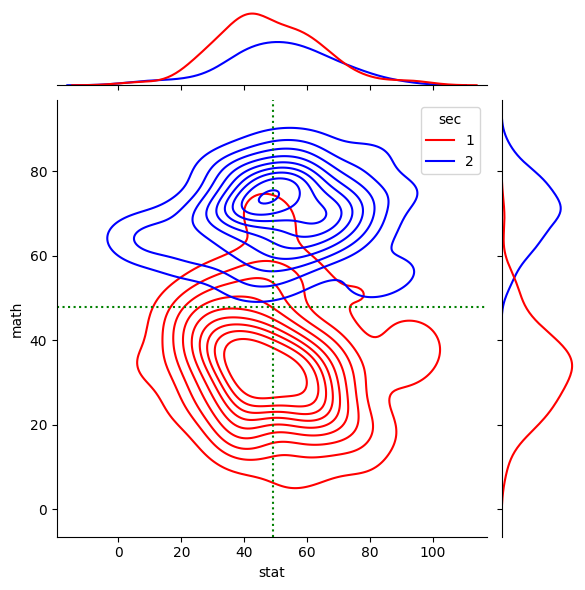

In [7]:
# Your code
g=sns.jointplot(data=df_score,
               x='stat',
               y='math',
               hue='sec',
               kind='kde',
               palette=['red', 'blue'])
#plt.axhline(df_score.math.mean())

g.ax_joint.axhline(y=df_score.math.mean(),
            c='g',
            ls=':')

g.ax_joint.axvline(x=df_score.stat.mean(),
            c='g',
            ls=':')

\
**1.2. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
พร้อมกับพิมพ์อธิบายว่าวิชาใดคะแนนของนิสิตต่างหมู่ (sec) มีความแตกต่างกันอย่างชัดเจน หากข้อสอบที่ใช้กับแต่ละหมู่เป็นข้อสอบคนละชุดให้นิสิตคาดการณ์ถึงสาเหตุที่ส่งผลให้นิสิตต่างหมู่มีคะแนนต่างกันอย่างชัดเจน  
  
ข้อแนะนำ  
- อาจต้องมีการแปลงข้อมูลให้อยู่ในรูปแบบที่สามารถใช้คำสั่ง plot ได้ง่ายขึ้น เช่น จากคอลัมน์ 'stat','math','comp' ทำอย่างไรให้มารวมอยู่ในคอลัมน์เดียวโดยตั้งชื่อว่า Subject โดยมีอีกคอลัมน์ชื่อ Score สำหรับเก็บคะแนนวิชานั้นๆ (นิสิตลองศึกษา https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

ex4_plot2.svg

,ID,sec,Subject,Score
0,ID-1,1,stat,45.97
1,ID-2,1,stat,40.05
2,ID-3,1,stat,38.24
3,ID-4,1,stat,40.64
4,ID-5,1,stat,51.72
...,...,...,...,...
595,ID-196,2,comp,70.96
596,ID-197,2,comp,88.73
597,ID-198,2,comp,63.27
598,ID-199,2,comp,67.04


<Axes: xlabel='Subject', ylabel='Score'>

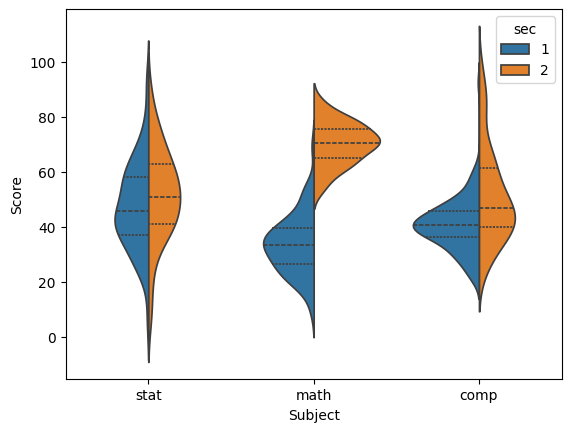

In [11]:
# Your code
df_score_melt = df_score.melt(value_vars=['stat','math','comp'],
                              id_vars=['ID', 'sec'],
                              var_name='Subject',
                              value_name='Score')
display(df_score_melt)
#see https://pandas.pydata.org/docs/reference/api/pandas.melt.html

sns.violinplot(data=df_score_melt,
               y='Score',
               x='Subject',
               hue='sec',
               split=True,
               inner='quartile',
               palette='tab10'
               )

####  
### ตอนที่ 2: ชุดข้อมูล TestDuration.csv

\
**2.1. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
  
ข้อแนะนำ  
- Duration_mins หมายถึงช่วงเวลาตั้งแต่ Start ถึง End ในหน่วยนาที ดังนั้นต้องหาวิธีในการจัดการข้อมูลเวลา
- อาจพิจารณาใช้ total_seconds() ประกอบการคำนวณ https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html

ex4_plot3.svg

In [12]:
df_test = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/TestDuration.csv")
df_test.head()

,Student ID,Group,Gender,Start,End
0,1,A,F,13:00,15:05
1,2,A,M,14:10,16:00
2,3,C,M,12:50,14:23
3,4,B,F,9:15,10:45
4,5,A,M,13:05,16:25


In [13]:
# Your code
df_test.Start = pd.to_timedelta(df_test.Start + ':00')
df_test.End = pd.to_timedelta(df_test.End + ':00')
df_test['Duration'] = df_test.End - df_test.Start
df_test.head()

,Student ID,Group,Gender,Start,End,Duration
0,1,A,F,0 days 13:00:00,0 days 15:05:00,0 days 02:05:00
1,2,A,M,0 days 14:10:00,0 days 16:00:00,0 days 01:50:00
2,3,C,M,0 days 12:50:00,0 days 14:23:00,0 days 01:33:00
3,4,B,F,0 days 09:15:00,0 days 10:45:00,0 days 01:30:00
4,5,A,M,0 days 13:05:00,0 days 16:25:00,0 days 03:20:00


In [15]:
df_test['Duration_mins'] = [du.total_seconds()/60 for du in df_test.Duration]
df_test.head()

,Student ID,Group,Gender,Start,End,Duration,Duration_mins
0,1,A,F,0 days 13:00:00,0 days 15:05:00,0 days 02:05:00,125.0
1,2,A,M,0 days 14:10:00,0 days 16:00:00,0 days 01:50:00,110.0
2,3,C,M,0 days 12:50:00,0 days 14:23:00,0 days 01:33:00,93.0
3,4,B,F,0 days 09:15:00,0 days 10:45:00,0 days 01:30:00,90.0
4,5,A,M,0 days 13:05:00,0 days 16:25:00,0 days 03:20:00,200.0


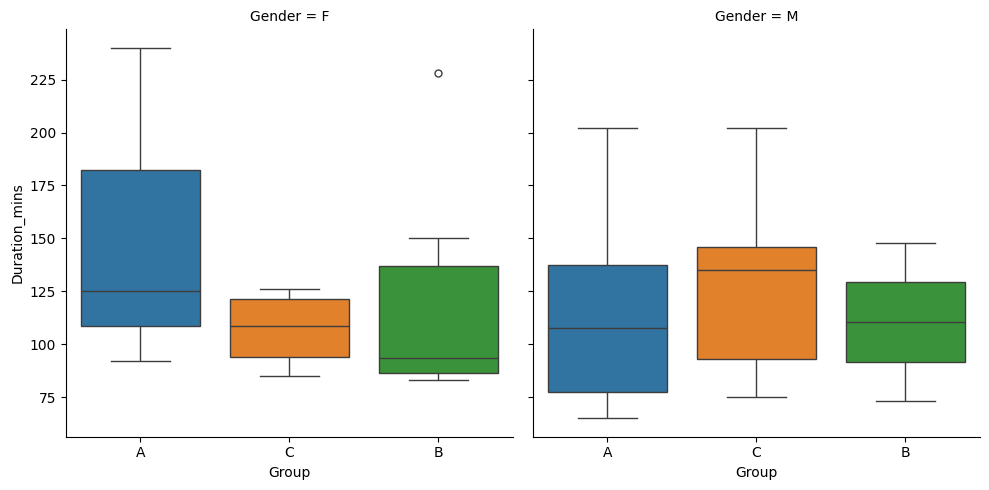

In [16]:
sns.catplot(data=df_test,
            x='Group',
            y='Duration_mins',
            kind='box',
            hue='Group',
            col='Gender')